In [1]:
import requests
import json
import cv2
import gdown
import matplotlib.pyplot as plt
from py_dotenv import read_dotenv
import os

In [2]:
url = "https://fal.ai/models/illusion-diffusion/api"
F_1_API=os.getenv("Flower_1_API")

headers = {
    "Authorization":F_1_API ,
    "Content-Type": "application/json"
}

payload = {
    "image_url": "https://storage.googleapis.com/falserverless/illusion-examples/pattern.png",
    "prompt": "(masterpiece:1.4), (best quality), (detailed), a Chamomile",
    "negative_prompt": "(worst quality, poor details:1.4), lowres, (artist name, signature, watermark:1.4), bad-artist-anime, bad_prompt_version2, bad-hands-5, ng_deepnegative_v1_75t"
}


response = requests.post(url, json=payload, headers=headers)#وقتی ما به سرور ارسال می کنیم از پست استفاده می کنیم
response.status_code

200

In [3]:
response.text

'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width" /><title>Illusion Diffusion | fal.ai</title><meta name="robots" content="index, nofollow" /><meta name="description" /><meta property="og:title" content="Illusion Diffusion served by fal.ai" /><meta property="og:type" content="article:ml" /><meta property="og:description" /><meta property="og:image" content="https://storage.googleapis.com/falserverless/gallery/illusion-diffusion.jpeg" /><meta property="og:url" content="https://fal.ai/models/illusion-diffusion" /><meta name="next-head-count" content="10" /><link href="/favicon.png" rel="shortcut icon" type="image/x-icon" /><link href="/apple-icon-256.png" rel="apple-touch-icon" /><link rel="sitemap" type="application/xml" title="fal.ai sitemap" href="/sitemap.xml" /><link rel="preload" href="/_next/static/css/c75196c26628bdc5.css" as="style" /><link rel="stylesheet" href="/_next/static/css/c75196c26628bdc5.css" data-n-g /><li

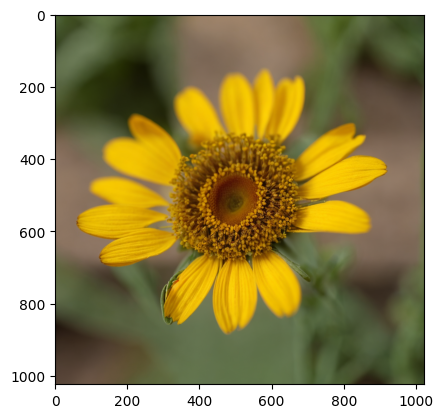

In [15]:
img = cv2.imread('flower.png')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [46]:
url = "https://my-api.plantnet.org/v2/identify/all"

F_2_API=os.getenv("Flower_2_API")

headers = {

 }
payload ={ 
    "api-key":F_2_API

 }
files = {
     "images": open("flower.png", "rb")
 }



response = requests.post(url, headers=headers , params=payload, files=files)  
    
print(response.status_code)    
try:
    if response.status_code==200:
        print("this status-code is valid:\n",response.json())
    else:
        raise ValueError("The number is not equal to 200.")
except ValueError as e:
    print(' this status_code is not valid and go to this web-site for analyses that:https://developer.mozilla.org/en-US/docs/Web/HTTP/Status')

200
this status-code is valid:
 {'query': {'project': 'all', 'images': ['79efe308b12eafdf3490c384226d6441'], 'organs': ['auto'], 'includeRelatedImages': False, 'noReject': False}, 'language': 'en', 'preferedReferential': 'k-world-flora', 'bestMatch': 'Hymenoxys hoopesii (A.Gray) Bierner', 'results': [{'score': 0.07855, 'species': {'scientificNameWithoutAuthor': 'Hymenoxys hoopesii', 'scientificNameAuthorship': '(A.Gray) Bierner', 'genus': {'scientificNameWithoutAuthor': 'Hymenoxys', 'scientificNameAuthorship': '', 'scientificName': 'Hymenoxys'}, 'family': {'scientificNameWithoutAuthor': 'Asteraceae', 'scientificNameAuthorship': '', 'scientificName': 'Asteraceae'}, 'commonNames': ['Orange-sneezeweed', "Owl's-claws", 'Western-sneezeweed'], 'scientificName': 'Hymenoxys hoopesii (A.Gray) Bierner'}, 'gbif': {'id': '3150175'}, 'powo': {'id': '979217-1'}}, {'score': 0.03597, 'species': {'scientificNameWithoutAuthor': 'Verbesina encelioides', 'scientificNameAuthorship': '(Cav.) Benth. & Hook.f

In [47]:
result =response.json()

In [48]:
print(result['results'][1]['species']['genus']['scientificName'])

Verbesina
